# tf.data

In [1]:
import os
from glob import glob
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/batang.ttc'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

C:\Users\Ssoony\AppData\Local\Temp\ipykernel_28608\4219486635.py:11: MatplotlibDeprecationWarning: The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()
Matplotlib needs fontconfig>=2.7 to query system fonts.


In [2]:
with open('../../data/DL_data/data/Training/img_data_control_label/001_G1/001_G1_01_무광원_계기판_정상주시_20200917_182234_02144.json','r') as f:
    json_data = json.load(f)

In [3]:
json_data['ObjectInfo']['BoundingBox']['Face']['Position']

[245, 628, 551, 904]

In [4]:
path='C:/Users/Ssoony/Documents/ds_study/data/DL_data/data/'
dataset = {'where':[], 'img_path' :[], 'status':[], 'ID':[], 'Leye_pos':[], 'Reye_pos':[], 'Leye_open':[], 'Reye_open':[], 'face_pos':[] }

In [5]:
for where in os.listdir(path):
    for id in os.listdir(path + where + '/img_data_control'):
        for img in glob(path + where + '/img_data_control/' + id + '/*.jpg'):
            dataset['where'].append(where)
            dataset['img_path'].append(img)
            dataset['status'].append(img.split('_')[-4])
            dataset['ID'].append(id)
                

In [6]:
for where in os.listdir(path):
    for id in os.listdir(path + where + '/img_data_control_label'):
        for label_path in glob(path + where + '/img_data_control_label/' + id + '/*.json'):
            with open(label_path,'r') as f:
                json_data = json.load(f)
                dataset['Leye_pos'].append(json_data['ObjectInfo']['BoundingBox']['Leye']['Position'])
                dataset['Reye_pos'].append(json_data['ObjectInfo']['BoundingBox']['Reye']['Position'])
                dataset['Leye_open'].append(json_data['ObjectInfo']['BoundingBox']['Leye']['Opened'])
                dataset['Reye_open'].append(json_data['ObjectInfo']['BoundingBox']['Reye']['Opened'])
                dataset['face_pos'].append(json_data['ObjectInfo']['BoundingBox']['Face']['Position'])

In [7]:
data_last = pd.DataFrame(dataset)
data_last.head()

,where,img_path,status,ID,Leye_pos,Reye_pos,Leye_open,Reye_open,face_pos
0,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,정상주시,001_G1,"[291, 665, 373, 706]","[418, 660, 499, 701]",True,True,"[245, 628, 551, 904]"
1,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,정상주시,001_G1,"[298, 665, 372, 704]","[418, 664, 499, 705]",True,True,"[256, 633, 561, 907]"
2,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,졸음재현,001_G1,"[290, 665, 366, 700]","[413, 658, 498, 702]",False,False,"[251, 626, 561, 900]"
3,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,졸음재현,001_G1,"[290, 665, 366, 699]","[414, 658, 499, 701]",False,False,"[251, 626, 562, 901]"
4,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,하품재현,001_G1,"[301, 612, 375, 650]","[420, 616, 501, 656]",False,False,"[265, 575, 561, 866]"


In [99]:
data_last['Status_drowsiness'] = np.where(data_last['status']>='졸음재현', '졸음', '정상')

In [100]:
data_last

,where,img_path,status,ID,Leye_pos,Reye_pos,Leye_open,Reye_open,face_pos,Status_drowsiness
0,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,정상주시,001_G1,"[291, 665, 373, 706]","[418, 660, 499, 701]",True,True,"[245, 628, 551, 904]",정상
1,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,정상주시,001_G1,"[298, 665, 372, 704]","[418, 664, 499, 705]",True,True,"[256, 633, 561, 907]",정상
2,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,졸음재현,001_G1,"[290, 665, 366, 700]","[413, 658, 498, 702]",False,False,"[251, 626, 561, 900]",졸음
3,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,졸음재현,001_G1,"[290, 665, 366, 699]","[414, 658, 499, 701]",False,False,"[251, 626, 562, 901]",졸음
4,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,하품재현,001_G1,"[301, 612, 375, 650]","[420, 616, 501, 656]",False,False,"[265, 575, 561, 866]",졸음
...,...,...,...,...,...,...,...,...,...,...
112861,Validation,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,졸음재현,267_G1,"[290, 789, 375, 828]","[430, 786, 528, 824]",False,False,"[235, 736, 564, 996]",졸음
112862,Validation,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,정상주시,267_G1,"[196, 676, 244, 717]","[273, 668, 346, 707]",True,True,"[185, 615, 498, 935]",정상
112863,Validation,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,정상주시,267_G1,"[178, 691, 226, 732]","[241, 684, 314, 723]",True,True,"[166, 634, 479, 954]",정상
112864,Validation,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,졸음재현,267_G1,"[205, 704, 270, 735]","[297, 700, 376, 735]",False,False,"[192, 640, 517, 950]",졸음


In [38]:
len(data_last)

112866

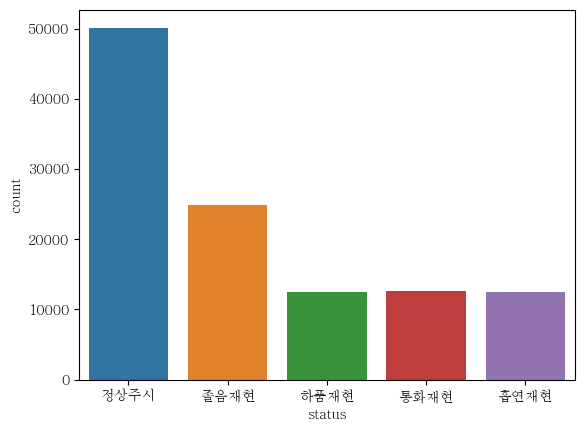

In [44]:
sns.countplot(x='status', data = data_last)
plt.show()

In [11]:
import cv2

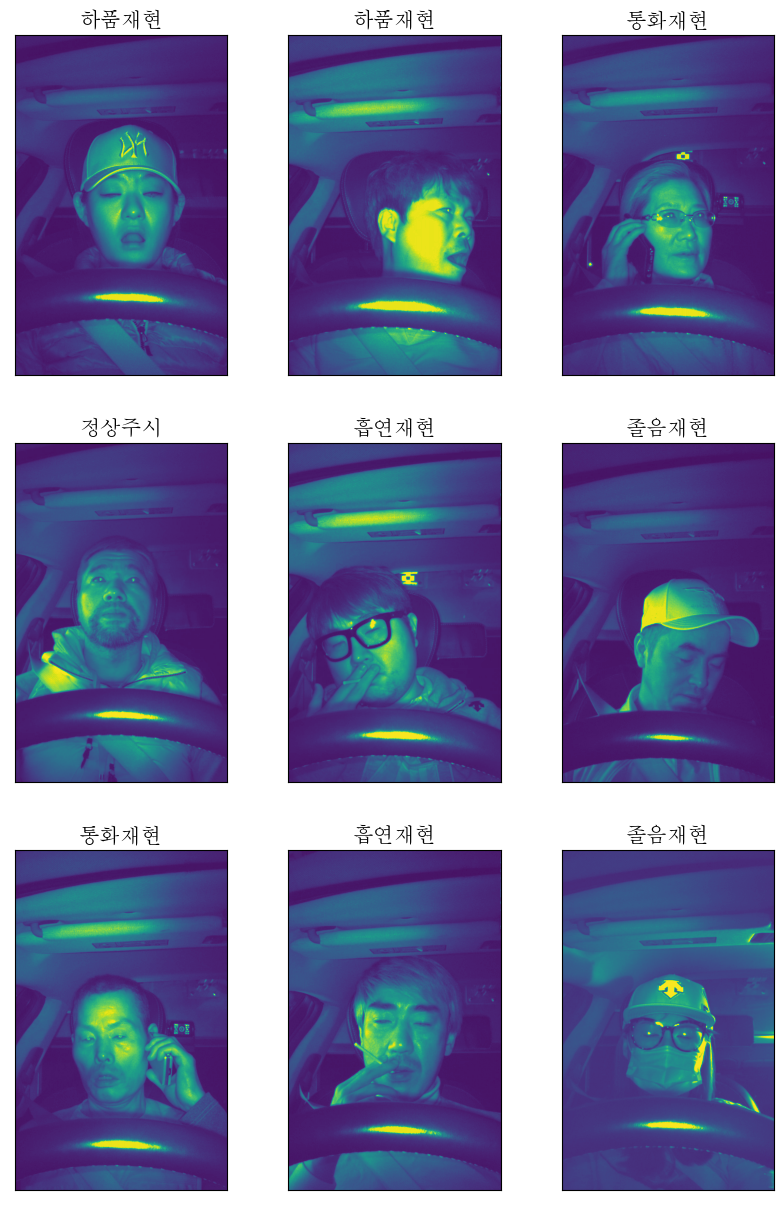

In [12]:
plt.figure(figsize=(10,15))
for i in range(9):
    random = np.random.randint(1,len(data_last))
    plt.subplot(3,3,i+1)
    plt.imshow(cv2.imdecode(np.fromfile(data_last.loc[random, 'img_path'], dtype=np.uint8), cv2.IMREAD_GRAYSCALE))
    plt.title(data_last.loc[random,'status'], size=15)
    plt.xticks([])
    plt.yticks([])
plt.show() 

In [13]:
from PIL import Image, ImageDraw

In [40]:
data_last.head(1)

,where,img_path,status,ID,Leye_pos,Reye_pos,Leye_open,Reye_open,face_pos
0,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,정상주시,001_G1,"[291, 665, 373, 706]","[418, 660, 499, 701]",True,True,"[245, 628, 551, 904]"


In [45]:
img = Image.open(data_last.loc[0,'img_path']).convert('RGB')

In [43]:
data_last.loc[0,'face_pos']

[245, 628, 551, 904]

In [47]:
croppedImage = img.crop((245, 628, 551, 904))
croppedImage.show()

print("잘려진 사진 크기 :", croppedImage.size)

잘려진 사진 크기 : (306, 276)


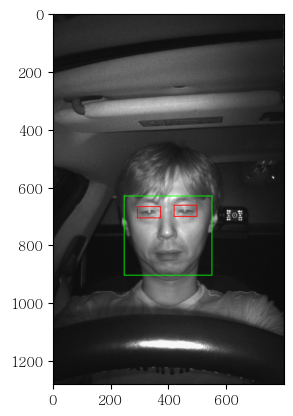

In [42]:
draw = ImageDraw.Draw(img)
draw.rectangle(tuple(data_last.loc[0,'face_pos']), outline=(0,255,0), width=3)
draw.rectangle(tuple(data_last.loc[0,'Leye_pos']), outline=(255,0,0), width=3)
draw.rectangle(tuple(data_last.loc[0,'Reye_pos']), outline=(255,0,0), width=3)
plt.imshow(img)

# 데이터 전처리

## - 데이터 불러오기

In [8]:
x_train_path_list=list(data_last[data_last['where']=='Training']['img_path'])
x_test_path_list=list(data_last[data_last['where']=='Validation']['img_path'])

In [9]:
label_names=list(data_last['status'].unique())

## - resize 하기

In [14]:
img1 = cv2.imdecode(np.fromfile(data_last.loc[0,'img_path'], dtype=np.uint8), cv2.IMREAD_GRAYSCALE)

In [15]:
img1.shape[1]

800

In [16]:
width=50
aspect_ratio = float(width) / img1.shape[1]
dsize = [int(img1.shape[0] * aspect_ratio),width]

In [17]:
dsize

[80, 50]

In [58]:
data_last.loc[0,'face_pos']

[245, 628, 551, 904]

In [87]:
gfile = tf.io.read_file(data_last.loc[0,'img_path'])
img = tf.io.decode_image(gfile, expand_animations=False)
img = tf.image.crop_to_bounding_box(img,data_last.loc[0,'face_pos'][1],data_last.loc[0,'face_pos'][0],data_last.loc[0,'face_pos'][3]-data_last.loc[0,'face_pos'][1],data_last.loc[0,'face_pos'][2]-data_last.loc[0,'face_pos'][0])
img = tf.cast(img, tf.uint8)

In [85]:
data_last.loc[0,'face_pos'][1],data_last.loc[0,'face_pos'][0],data_last.loc[0,'face_pos'][3]-data_last.loc[0,'face_pos'][1],data_last.loc[0,'face_pos'][2]-data_last.loc[0,'face_pos'][0]

(628, 245, 276, 306)

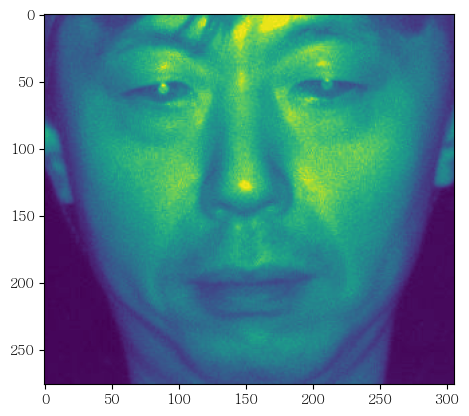

In [88]:
plt.imshow(img)

In [116]:
label_names=['졸음','정상']

In [117]:
data_last['img_path']

0         C:/Users/Ssoony/Documents/ds_study/data/DL_dat...
1         C:/Users/Ssoony/Documents/ds_study/data/DL_dat...
2         C:/Users/Ssoony/Documents/ds_study/data/DL_dat...
3         C:/Users/Ssoony/Documents/ds_study/data/DL_dat...
4         C:/Users/Ssoony/Documents/ds_study/data/DL_dat...
                                ...                        
112861    C:/Users/Ssoony/Documents/ds_study/data/DL_dat...
112862    C:/Users/Ssoony/Documents/ds_study/data/DL_dat...
112863    C:/Users/Ssoony/Documents/ds_study/data/DL_dat...
112864    C:/Users/Ssoony/Documents/ds_study/data/DL_dat...
112865    C:/Users/Ssoony/Documents/ds_study/data/DL_dat...
Name: img_path, Length: 112866, dtype: object

In [168]:
data_last.loc[0,'img_path'].split('_')[-4]

'정상주시'

In [201]:
lbl_name = tf.strings.split(data_last.loc[0,'img_path'],'_')[-4]

In [182]:
lbl_name

<tf.Tensor: shape=(), dtype=string, numpy=b'\xec\xa0\x95\xec\x83\x81\xec\xa3\xbc\xec\x8b\x9c'>

In [202]:
lbl_name = tf.strings.substr(lbl_name, pos=0,len=6)

In [203]:
lbl_name

<tf.Tensor: shape=(), dtype=string, numpy=b'\xec\xa0\x95\xec\x83\x81'>

In [204]:
onehot = tf.cast(lbl_name == label_names, tf.float32)

In [205]:
label_names

['졸음', '정상']

In [287]:
def get_label(path):
    lbl_name = tf.strings.split(path,'_')[-4]
    if lbl_name != '졸음':
        lbl_name = '정상'
    lbl_name = tf.strings.substr(lbl_name, pos=0,len=6)
    onehot = tf.cast(lbl_name == label_names, tf.float32)
    return onehot

In [288]:
def load_img_label(path):
    gfile = tf.io.read_file(path)
    img = tf.io.decode_image(gfile, expand_animations=False)
    img = tf.image.crop_to_bounding_box(img,data_last.loc[0,'face_pos'][1],data_last.loc[0,'face_pos'][0],data_last.loc[0,'face_pos'][3]-data_last.loc[0,'face_pos'][1],data_last.loc[0,'face_pos'][2]-data_last.loc[0,'face_pos'][0])
    img = tf.image.resize(img, [300,300])
    img = tf.cast(img, tf.uint8)
    label = get_label(path)
    return img, label

## - dataset 만들기

In [281]:
train_dataset = tf.data.Dataset.from_tensor_slices(x_train_path_list)
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.map(load_img_label, num_parallel_calls=AUTOTUNE)
train_dataset = train_dataset.batch(32)
train_dataset = train_dataset.prefetch(AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size=1)
train_dataset = train_dataset.repeat()

In [282]:
test_dataset = tf.data.Dataset.from_tensor_slices(x_test_path_list)
AUTOTUNE = tf.data.experimental.AUTOTUNE
test_dataset = test_dataset.map(load_img_label, num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.batch(32)
test_dataset = test_dataset.prefetch(AUTOTUNE)
test_dataset = test_dataset.shuffle(buffer_size=1)
test_dataset = test_dataset.repeat()

## - ImageDataGenerator

In [92]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [93]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    horizontal_flip=True
)

In [102]:
data_last.head(1)

,where,img_path,status,ID,Leye_pos,Reye_pos,Leye_open,Reye_open,face_pos,Status_drowsiness
0,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,정상주시,001_G1,"[291, 665, 373, 706]","[418, 660, 499, 701]",True,True,"[245, 628, 551, 904]",정상


In [109]:
train_x_gen = datagen.flow_from_dataframe(
    data_last[data_last['where']=='Training'],
    x_col='img_path',
    y_col='Status_drowsiness',
    target_size=(100,100),
    class_model = 'categorical',
    color_mode='grayscale',
    batch_size=32
)

Found 100303 validated image filenames belonging to 2 classes.


In [104]:
test_x_gen = datagen.flow_from_dataframe(
    data_last[data_last['where']=='Validation'],
    x_col='img_path',
    y_col='Status_drowsiness',
    target_size=(100,100),
    class_model = 'categorical',
    color_mode='grayscale',
    batch_size=32
)

Found 12563 validated image filenames belonging to 2 classes.


In [97]:
x,y = next(iter(test_x_gen))

In [98]:
x.shape

(32, 100, 100, 1)

# ResNET

In [22]:
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.resnet_v2 import ResNet101V2
from keras.applications.resnet_v2 import ResNet152V2

In [23]:
model50 = ResNet50V2(include_top=True, weights=None,input_shape=(80,50,1), classes=5)

In [24]:
learning_rate = 0.05
opt = tf.keras.optimizers.Adam(learning_rate)
loss = tf.keras.losses.categorical_crossentropy

In [25]:
model50.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

In [27]:
history50=model50.fit(train_dataset, epochs=1, steps_per_epoch=len(x_train_path_list)//32, validation_data=test_dataset, validation_steps=len(x_test_path_list)//32)

 210/3134 [=>............................] - ETA: 1:14:49 - loss: 1.1253 - accuracy: 0.5048

KeyboardInterrupt: 

In [289]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Add, BatchNormalization, Dropout

In [290]:
def build_resnet(input_shape):
    inputs = Input(input_shape)

    net = Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu')(inputs)
    net = BatchNormalization()(net)
    net = MaxPool2D()(net)

    net1 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net)
    net1 = BatchNormalization()(net1)
    net2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(net1)
    net2 = BatchNormalization()(net2)
    net3 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net2)
    net3 = BatchNormalization()(net3)

    net_1_1 = Conv2D(64, kernel_size=1, padding='same')(net)
    net_1_1 = BatchNormalization()(net_1_1)
    net = Add()([net_1_1, net3])

    net1 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net)
    net1 = BatchNormalization()(net1)
    net2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(net1)
    net2 = BatchNormalization()(net2)
    net3 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net2)
    net3 = BatchNormalization()(net3)

    net = Add()([net, net3])

    net = MaxPool2D()(net)

    net = Flatten()(net)
    
    net = Dense(128, activation='softmax')(net)
    net = Dense(64, activation='softmax')(net)
    net = Dense(2, activation='softmax')(net)

    model = tf.keras.Model(inputs = inputs, outputs = net, name = 'resnet')

    return model

In [291]:
model1 = build_resnet((70,70, 1))
model1.summary()

Model: "resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_20 (InputLayer)          [(None, 70, 70, 1)]  0           []                               
                                                                                                  
 conv2d_144 (Conv2D)            (None, 35, 35, 32)   320         ['input_20[0][0]']               
                                                                                                  
 batch_normalization_144 (Batch  (None, 35, 35, 32)  128         ['conv2d_144[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 max_pooling2d_39 (MaxPooling2D  (None, 17, 17, 32)  0           ['batch_normalization_144[0]

In [292]:
learning_rate = 0.05
opt = tf.keras.optimizers.Adam(learning_rate)
loss = tf.keras.losses.categorical_crossentropy

In [293]:
model1.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [294]:
hist1 = model1.fit(train_dataset, epochs=5, steps_per_epoch=len(x_train_path_list)//32, validation_data=test_dataset, validation_steps=len(x_test_path_list)//32)

Epoch 1/5
 595/3134 [====>.........................] - ETA: 5:30 - loss: 0.0083 - accuracy: 1.0000

KeyboardInterrupt: 

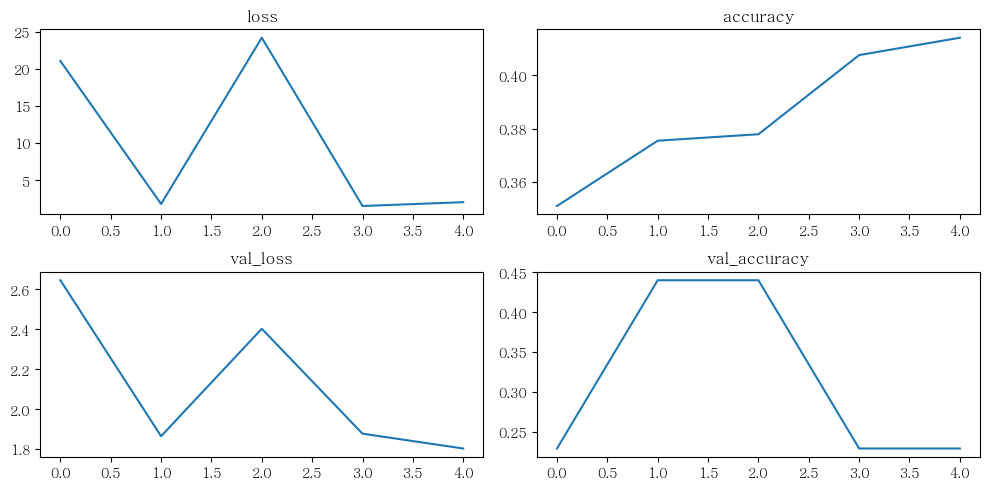

In [90]:
plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(hist1.history['loss'])
plt.title('loss')
plt.subplot(222)
plt.plot(hist1.history['accuracy'])
plt.title('accuracy')
plt.subplot(223)
plt.plot(hist1.history['val_loss'])
plt.title('val_loss')
plt.subplot(224)
plt.plot(hist1.history['val_accuracy'])
plt.title('val_accuracy')

plt.tight_layout()
plt.show()

# ImageGenerator 데이터

In [106]:
model2 = build_resnet((100,100,1))
model2.summary()

Model: "resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_32 (Conv2D)             (None, 50, 50, 32)   320         ['input_6[0][0]']                
                                                                                                  
 batch_normalization_32 (BatchN  (None, 50, 50, 32)  128         ['conv2d_32[0][0]']              
 ormalization)                                                                                    
                                                                                             

In [107]:
model2.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [108]:
hist2 = model2.fit(train_x_gen, epochs=5, validation_data=test_x_gen)

Epoch 1/5


InvalidArgumentError:  logits and labels must be broadcastable: logits_size=[32,5] labels_size=[32,2]
	 [[node categorical_crossentropy/softmax_cross_entropy_with_logits
 (defined at c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\keras\backend.py:5009)
]] [Op:__inference_train_function_27462]

Errors may have originated from an input operation.
Input Source operations connected to node categorical_crossentropy/softmax_cross_entropy_with_logits:
In[0] categorical_crossentropy/softmax_cross_entropy_with_logits/Reshape:	
In[1] categorical_crossentropy/softmax_cross_entropy_with_logits/Reshape_1:

Operation defined at: (most recent call last)
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\runpy.py", line 194, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
>>>     self.io_loop.start()
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\asyncio\base_events.py", line 570, in run_forever
>>>     self._run_once()
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\asyncio\base_events.py", line 1859, in _run_once
>>>     handle._run()
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\asyncio\events.py", line 81, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
>>>     await result
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
>>>     res = shell.run_cell(
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
>>>     return super().run_cell(*args, **kwargs)
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes
>>>     if await self.run_code(code, result, async_=asy):
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "C:\Users\Ssoony\AppData\Local\Temp\ipykernel_28608\1872426606.py", line 1, in <module>
>>>     hist2 = model2.fit(train_x_gen, epochs=5, validation_data=test_x_gen)
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\keras\engine\training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\keras\engine\training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\keras\engine\training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\keras\engine\training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\keras\engine\training.py", line 809, in train_step
>>>     loss = self.compiled_loss(
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
>>>     loss_value = loss_obj(y_t, y_p, sample_weight=sw)
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\keras\losses.py", line 141, in __call__
>>>     losses = call_fn(y_true, y_pred)
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\keras\losses.py", line 245, in call
>>>     return ag_fn(y_true, y_pred, **self._fn_kwargs)
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\keras\losses.py", line 1664, in categorical_crossentropy
>>>     return backend.categorical_crossentropy(
>>> 
>>>   File "c:\Users\Ssoony\miniconda3\envs\ds_study\lib\site-packages\keras\backend.py", line 5009, in categorical_crossentropy
>>>     return tf.nn.softmax_cross_entropy_with_logits(
>>> 

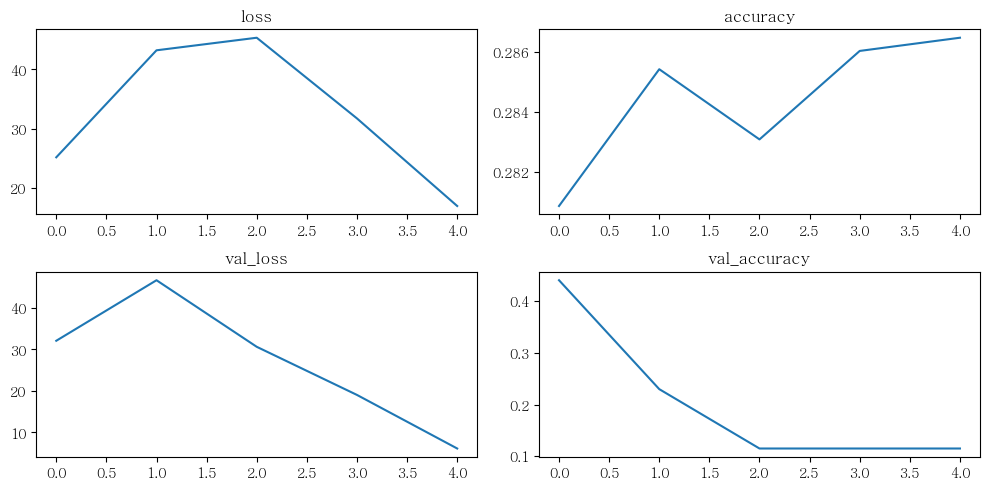

In [214]:
plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(hist2.history['loss'])
plt.title('loss')
plt.subplot(222)
plt.plot(hist2.history['accuracy'])
plt.title('accuracy')
plt.subplot(223)
plt.plot(hist2.history['val_loss'])
plt.title('val_loss')
plt.subplot(224)
plt.plot(hist2.history['val_accuracy'])
plt.title('val_accuracy')

plt.tight_layout()
plt.show()

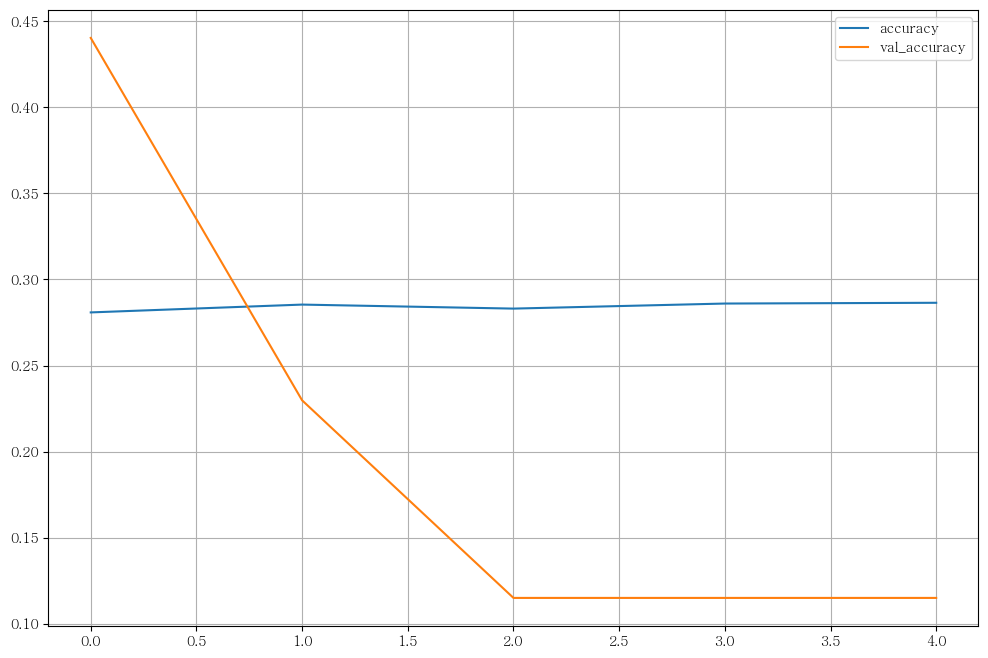

In [216]:
plot_target = ['accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist2.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [259]:
from numpy import argmax